# Introduction
This is some introductory material to the workbench

Initial step is to bring the ∆Q support material into scope

In [1]:
import DeltaQ.Workbench.Numeric

With this you can create your first ∆Q statement - a uniform delay between 0 and 1.

As ∆Qs can have many potential concrete representations, we need to give a hint to the compiler.

The particular concrete model we are using here is that of
- `Rational` to capture the probablity mass
- `Double` as the model of delay

we are also choosing a few other things which we will touch on later

In [2]:
uniform 0 1 :: DeltaQ

⊓[0,1.0]

What you see above is the printable representation of the resulting ∆Q expression.

This can be visualised as a CDF (cummulative distribution function) - it describes _the relationship_ betwen probablity mass and delay. 

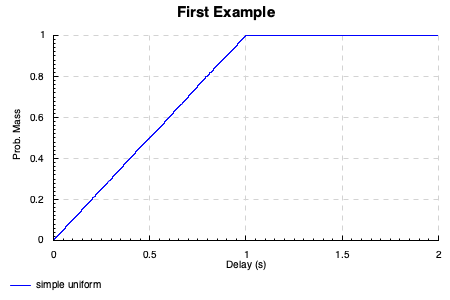

In [3]:
plotDQs "First Example" [("simple uniform", uniform 0 1)]

This notion of a relationship is important. It can be 'read' two ways.  

One use of ∆Q is to describe the _quality attentuation_ of outcomes - quality attenutation captures (at the same time) the _timeliness_ and _likelihood_.

Considering just timeliness for the moment, the two 'readings' become:

- If the delay has been $X$ seconds, the probabilty it will have occured is $P$: 
  Having waited $0.75s$ the probability of the outcome having occured will be $75\%$.
- If the required probabiity of occurance is $P$ then the delay will be (at least) $X$: 
  If $80\%$ completion is needed,  $0.8s$ will have had to elapse.

We will see that this duality is useful. The first viewpoint helps discuss notions like _emergent performance_ which is the sort of reasoning used in bottom-up design (e.g. taking existing system elements and combining them into something larger). The second viewpoint helps in _requirements capture_ and _design decomposition_; this helps with top-down design (e.g. given an overall goal how the problem space is decomposed into simpler elements).

It will be useful to remember this duality as we proceed, although the majority of the exposition will hardly mention it, that duality - those two different ways of viewing the expressions we construct and the plots we make, will be there.

## Combining ∆Qs

To help build the intutiion, we are now going to look at how ∆Qs can be combined and how issues of _likelihood_ are incorporated. 

Consider a (sequential) sequence of two outcomes - first perform **A** then (when **A** has occured) perform **B**. This is the sequential composition of outcomes. 

We are going to start using some of the features of haskell (which is the underlying language that this workbench is built) to simplfy the description.

In [4]:
unitUniform :: DeltaQ
unitUniform = uniform 0 1

(⊕) unitUniform unitUniform -- could also be written: unitUniform `Convolve` unitUniform

⊓[0,1.0] ⊕ ⊓[0,1.0]

Why '⊕' - convolution? We will see that ∆Q is very closely related to probabilty distributions. Calculating "Do **A** then do **B**" is equivalent to "Choose from **A** then choose from **B** and sum the values" which _is_ convolution of probablity distributions.

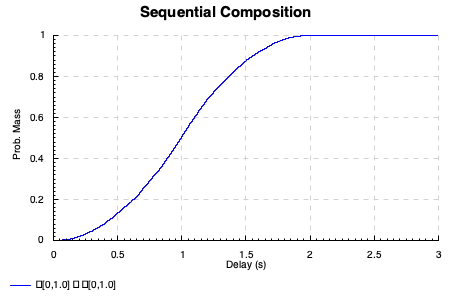

In [ ]:
plotDQs "Sequential Composition" [("⊓[0,1.0] ⊕ ⊓[0,1.0]", unitUniform `Convolve` unitUniform)]

_From the point of the view of the narrative I would have liked to talk about the PDF of the above CDFs. I have a (nacent) numerical view but it needs work as the resulting graphs are too 'spikey'. 
A better approach would be to quantise the resulting empiricalPDF into a suitable (100 - 500) histogram buckets before plotting. This has been captured in [an issue](https://github.com/DeltaQ-SD/planning-and-aspirations/issues/10)._

## Embracing imperfection

It is tempting, when programming, to see the underlying systems "as perfect". Quickly the nasty truth that imperfections are everywhere - in design, in implementation, in the hardware and in the overall environment. 

You quickly find that, even with all the exception handling in the world, that there remains a residual imperfection. The observation that failing to ignore imperfection (in all its forms) was a key factor in great 'ideas' withering as they met the RealWorld™ in the developmend of the notions of ∆Q and quality attenutation.

∆Q is working in a probablistic setting - imperfection being viewed as a _probablistic choice_ (⇋) between ∅ (_perfection_) and is opposite ⊥ (_bottom_). Perfection is the absence of any quality attenuation (hence its symbol)E, bottom is non-termination, failure etc., hence its symbol (from programming semantics).

So a 'quantity' of imperfection becomes a probablistic choice between perfection and bottom between instanteous success and failure.

In [ ]:
(⇋) (1/3) bottom perfection :: DeltaQ -- can also be written: ProbChoice (1/3) bottom perfection

⊥ (1⇋2) ∅

Here the '1⇋2' captures the notation of 'weighted choice'. It 'chooses' the left in the ration of 1 to 2. Why the notion of 'weights'? It turns out that some of the things that you want to do in an algebra (like simplification of expressions) are more naturally expressed in such terms. 

This permits us to consider two ∆Qs - the `unitUniform` along with choice between failure (⊥) or `unitUniform` - with a 5% 'failure' / 95% 'success' rate.

In [ ]:
ex2 :: DeltaQ
ex2 = (⊕) unitUniform ((⇋) (5/100) bottom unitUniform)
ex2

⊓[0,1.0] ⊕ ⊥ (1⇋19) ⊓[0,1.0]

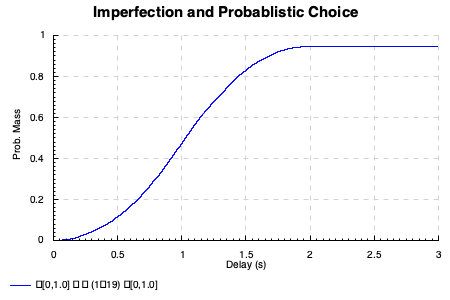

In [ ]:
plotDQs "Imperfection and Probablistic Choice" [(show ex2, ex2)]

This illustrates how this (less perfect) system does not yield an outcome 5% (1 in 20) of the occurances.

This 'lossprob' is a common question about some ∆Q expression. There are some issues of good practice here. You are encoraged to think of probablity as between 0 and 1, just as you should always think in terms of seconds for delay (the base SI unit). Communicating with others may require you to use percentages and other time units (from nanoseconds to days!).

In [ ]:
lossprob ex2 * 100

5.0

These are expressions in an algebra - therefore they can be 'rearranged' (as permitted by the rules of the algebra). The same applies to ∆Q - again more on this later, surfice it to say normalisation of expressions is very useful in helping contain computational complexity.

In [ ]:
putStrLn $ show ex2 ++ " when normalised is " ++ show (normaliseDeltaQ ex2)

⊓[0,1.0] ⊕ ⊥ (1⇋19) ⊓[0,1.0] when normalised is ⊥ (1⇋19) ⊓[0,1.0] ⊕ ⊓[0,1.0]

_this seems like a good break point - one to wrap up with a more complex example as a teaser and then put (as bullet points) what is next - which may well be in other notebooks)_